In [5]:
import numpy as np
import sys
print(sys.executable)
import pandas as pd


import matplotlib.pyplot as plt
from utils import *
import copy
import math
#from public_tests import *

%matplotlib inline

c:\Python312\python.exe


In [7]:
#load data
df = pd.read_csv('updated_dataset.csv')

print(df.head())

# Extract features (X) - all columns except 'status'
X = df.drop(columns=['name', 'status']).values  # Assuming 'name' is just an identifier

# Extract the labels (y) - the 'status' column
y = df['status'].values

# Now you have X and y as numpy arrays
X_train = X
y_train = y

# Print the shapes of X_train and y_train to confirm
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [12]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[ 1.199920e+02  1.573020e+02  7.499700e+01  7.840000e-03  7.000000e-05
   3.700000e-03  5.540000e-03  1.109000e-02  4.374000e-02  4.260000e-01
   2.182000e-02  3.130000e-02  2.971000e-02  6.545000e-02  2.211000e-02
   2.103300e+01  4.147830e-01  8.152850e-01 -4.813031e+00  2.664820e-01
   2.301442e+00  2.846540e-01]
 [ 1.224000e+02  1.486500e+02  1.138190e+02  9.680000e-03  8.000000e-05
   4.650000e-03  6.960000e-03  1.394000e-02  6.134000e-02  6.260000e-01
   3.134000e-02  4.518000e-02  4.368000e-02  9.403000e-02  1.929000e-02
   1.908500e+01  4.583590e-01  8.195210e-01 -4.075192e+00  3.355900e-01
   2.486855e+00  3.686740e-01]
 [ 1.166820e+02  1.311110e+02  1.115550e+02  1.050000e-02  9.000000e-05
   5.440000e-03  7.810000e-03  1.633000e-02  5.233000e-02  4.820000e-01
   2.757000e-02  3.858000e-02  3.590000e-02  8.270000e-02  1.309000e-02
   2.065100e+01  4.298950e-01  8.252880e-01 -4.443179e+00  3.111730e-01
   2.342259e+00  3.326340e-01]
 [ 1.1

In [ ]:
# Code Assignment starts here
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [1 1 1 1 1]
Type of y_train: <class 'numpy.ndarray'>


In [ ]:
# Code Assignment starts here
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (1000, 22)
The shape of y_train is: (1000,)
We have m = 1000 training examples


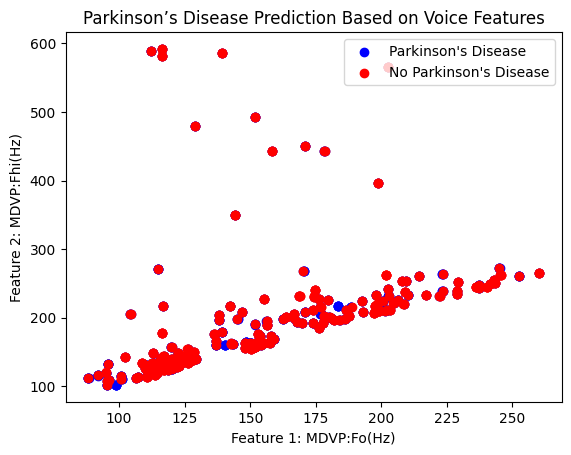

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(X, y, pos_label="Parkinson's Disease", neg_label="No Parkinson's Disease"):
    """
    Plots the data as a scatter plot for the Parkinson's disease dataset.
    
    X: 2D numpy array of shape (n_samples, 2) - features (voice measurements)
    y: 1D numpy array of shape (n_samples,) - labels (Parkinson's or not)
    pos_label: string - label for the positive class (default: "Parkinson's Disease")
    neg_label: string - label for the negative class (default: "No Parkinson's Disease")
    """
    # Select points where y = 1 (Parkinson's Disease) and y = 0 (No Parkinson's Disease)
    parkinsons = X[y == 1]
    no_parkinsons = X[y == 0]

    # Create the plot
    plt.scatter(parkinsons[:, 0], parkinsons[:, 1], color='b', label=pos_label)
    plt.scatter(no_parkinsons[:, 0], no_parkinsons[:, 1], color='r', label=neg_label)

    # Set axis labels
    plt.xlabel('Feature 1: MDVP:Fo(Hz)')
    plt.ylabel('Feature 2: MDVP:Fhi(Hz)')

    # Set the title and legend
    plt.title('Parkinson’s Disease Prediction Based on Voice Features')
    plt.legend(loc="upper right")

# Assuming you have already loaded your X_train and y_train data
# Call the function to plot the data
plot_data(X_train, y_train, pos_label="Parkinson's Disease", neg_label="No Parkinson's Disease")

# Show the plot
plt.show()


In [ ]:
# Code Assignment starts here
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    # YOUR CODE HERE
    g = 1 / (1 + np.exp(-z))
        
    return g

In [ ]:
# Code Assignment starts here

# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    # YOUR CODE HERE
    m, n = X.shape  # m is the number of training examples, n is the number of features
    
    # Compute the linear combination z = X.dot(w) + b
    z = np.dot(X, w) + b
    
    # Apply sigmoid function to compute predictions
    f_wb = 1 / (1 + np.exp(-z))  # or use the sigmoid function implemented earlier
    
    # Compute the cost using vectorized operations
    cost = -y * np.log(f_wb) - (1 - y) * np.log(1 - f_wb)
    
    # Compute the total cost (mean of all costs)
    total_cost = np.sum(cost) / m
    
    return total_cost

    return total_cost

In [19]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [26]:
# Initialize test_w with the correct size (22 features)
test_w = np.zeros(X_train.shape[1])  # 22 features, so test_w should have 22 elements
test_b = -24 # You can initialize b to zero or any value you prefer

# Compute the cost using your compute_cost function
cost = compute_cost(X_train, y_train, test_w, test_b)

# Print the cost
print('Cost at test w,b: {:.3f}'.format(cost))

Cost at test w,b: 12.984


In [27]:
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    # YOUR CODE HERE
    m, n = X.shape  # m = number of examples, n = number of features
    
    # Compute the linear combination z = X.dot(w) + b
    z = np.dot(X, w) + b
    
    # Apply the sigmoid function to compute predictions f_wb
    f_wb = 1 / (1 + np.exp(-z))  # or use the sigmoid function we defined earlier
    
    # Compute the error term (difference between predictions and actual values)
    error = f_wb - y
    
    # Compute the gradient w.r.t. b (scalar)
    dj_db = np.sum(error) / m
    
    # Compute the gradient w.r.t. w (vector)
    dj_dw = np.dot(X.T, error) / m
    
    return dj_db, dj_dw

        
    return dj_db, dj_dw

In [31]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.041
dj_dw at initial w (zeros):[-5.038922900407723, -6.09526219080169, -3.677213626550577, 0.0007462249896445018, -0.0009680325811453293, -0.0005518529727914567, -0.0011492079853819383, -0.001175882223175186, -0.0021493244109810094, -0.01475399062973023, 0.0010367639201319698, -0.0010683644902527837, -0.0013584357956840745, -0.0028463683860252935, -0.00020893631210938102, -0.7587891384569959, -0.02309663516494826, -0.031183711757962716, 0.19422365600857913, -0.012295775407210715, -0.10574406697324722, -0.011238131625506673]


In [32]:
# Compute and display cost and gradient with non-zero w
test_w = np.zeros(X_train.shape[1])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

dj_db at test_w: -0.5409999999622487
dj_dw at test_w: [-81.88432764496078, -104.26903141340753, -61.54977942759337, -0.003431336604449794, -0.0005897830306511294, -0.0010501463459442013, -0.0022029376296311743, -0.0069527890417777054, -0.017035830740345866, -0.15445967289189377, -0.005740776853066115, -0.01114635077250512, -0.01354219104375969, -0.026462937330142242, -0.011631995957180738, -11.698021295715971, -0.27395999050525593, -0.39077873876235036, 3.02646814841196, -0.1266016510311243, -1.2961461890635626, -0.11475232350429274]


stopped before 2.6